In [16]:
import numpy as np

#import Tools
#import LabFuncs
import MaxwellBoltzmann as MB
 
import matplotlib
from matplotlib import pyplot as plt
 
import sys
 
from scipy import interpolate
from glob import glob
import pickle
 
import os
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 20})

In [20]:
#Plot the velocity distributions as a function of isodetection angle
#for a given mass and cross-section
def plot_velocity_distributions(m_x, sigma_p, logy=False):
    Ngamma = 3#25#100
    Nv     = 100
    v_list = np.linspace(0.0, 800.0, 1000)

    #fname = "veldists/f_hDP_MOD_mx" + '{0:.3f}'.format(m_x) + "_lsig" + '{0:.2f}'.format(np.log10(sigma_p)) + ".txt"
    fname = "/home/alantero/repositories/verne_RW/results/veldists/f_hDP_MOD_mx0.010_lsig-33.00.txt"
    #fname = "/home/alantero/repositories/verne_RW/results/veldists/f_hDP_MOD_mx0.010_lsig-34.00.txt"
    try:
        #_fs just contains the attenuated DM velocity distribution
        #_fs_full includes also an ad-hoc contribution from "reflected" DM particles
        _gammas, _vs, _fs, _fs_full = np.loadtxt(fname, unpack=True)
    except:
        print("> Error opening file:", fname)
        print("> Exiting...")
        sys.exit()

    gamma_grid = np.reshape(_gammas, (Ngamma, Nv))
    v_grid = np.reshape(_vs, (Ngamma, Nv))
    f_grid = np.reshape(_fs, (Ngamma, Nv))
    f_full_grid = np.reshape(_fs_full, (Ngamma, Nv))

    #print(v_grid.shape)
    #print(gamma_grid.shape)
    #print(f_full_grid)


    colmap = matplotlib.cm.get_cmap('turbo_r')

    plt.figure()

    ax0 = plt.gca()
    ax0.plot(v_list, MB.calcf_SHM(v_list), linestyle='--', color='k')

    ax0.set_title("One Scattering")
    f_int = interpolate.interp2d(v_grid, gamma_grid, f_full_grid)
    for i in range(Ngamma):
        ax0.plot(v_grid[i,:],f_int(v_grid[i,:],np.unique(gamma_grid[i,:])), color=colmap(i/(Ngamma-1)), alpha = 0.6)

    if (logy):
        ax0.set_ylim(1e-5, 1e-2)
        ax0.set_yscale('log')
    else:
        ax0.set_ylim(0, 0.007)

    ax0.set_xlim(0, 800)

    ax0.set_xlabel(r'$v$ [km/s]')
    ax0.set_ylabel(r'$f_\chi(v)$ [(km/s)$^{-1}$]')

    ax0.plot(-100, 0, color=colmap(0.999), label=r'$\gamma = \pi, \Theta = 0$')
    ax0.plot(-100, 0, color=colmap(0.5), label=r'$\gamma = \frac{\pi}{2}, \Theta = \frac{\pi}{2}$')
    ax0.plot(-100, 0, color=colmap(0), label=r'$\gamma = 0, \Theta = \pi$')

    df_inf = pd.read_csv("DAMASCUS_GammaPi.csv", comment="#")
    x1,y1 = df_inf["X"],df_inf["Y"]
    #print(y1)
    ax0.plot(x1,y1, color="r", label=r"DAMASCUS $\Theta=\pi$", linewidth=4,alpha=0.6)
    
    ax0.legend(loc='best')
    plt.show()

    ax1 = plt.gca()
    ax1.plot(v_list, MB.calcf_SHM(v_list), linestyle='--', color='k')

    ax1.set_title("No Scattering")
    f_int_unsc = interpolate.interp2d(v_grid, gamma_grid, f_grid)
    for i in range(Ngamma):
        ax1.plot(v_grid[i,:],f_int_unsc(v_grid[i,:],np.unique(gamma_grid[i,:])), color=colmap(i/(Ngamma-1)), alpha = 0.6)

    if (logy):
        ax1.set_ylim(1e-5, 1e-2)
        ax1.set_yscale('log')
    else:
        ax1.set_ylim(0, 0.007)
 
    ax1.set_xlim(0, 800)
 
    ax1.set_xlabel(r'$v$ [km/s]')
    ax1.set_ylabel(r'$f_\chi(v)$ [(km/s)$^{-1}$]')

    ax1.plot(-100, 0, color=colmap(0.999), label=r'$\gamma = \pi, \Theta = 0$')
    ax1.plot(-100, 0, color=colmap(0.5), label=r'$\gamma = \frac{\pi}{2}, \Theta = \frac{\pi}{2}$')
    ax1.plot(-100, 0, color=colmap(0), label=r'$\gamma = 0, \Theta = \pi$')

    ax1.plot(x1,y1, color="r", label=r"DAMASCUS $\Theta=\pi$", linewidth=4,alpha=0.6)

    
    ax1.legend(loc='best')
    plt.show()
 
    ax2 = plt.gca()
    ax2.plot(v_list, MB.calcf_SHM(v_list), linestyle='--', color='k')

    ax2.set_title("No Scattering + One Scattering")
    f_int_unsc = interpolate.interp2d(v_grid, gamma_grid, f_grid)
    for i in range(Ngamma):
        ax2.plot(v_grid[i,:],f_int(v_grid[i,:],np.unique(gamma_grid[i,:]))+f_int_unsc(v_grid[i,:],np.unique(gamma_grid[i,:])), color=colmap(i/(Ngamma-1)), alpha = 0.6)

    if (logy):
        ax2.set_ylim(1e-5, 1e-2)
        ax2.set_yscale('log')
    else:
        ax2.set_ylim(0, 0.007)

    ax2.set_xlim(0, 800)
 
    ax2.set_xlabel(r'$v$ [km/s]')
    ax2.set_ylabel(r'$f_\chi(v)$ [(km/s)$^{-1}$]')
 
    ax2.plot(-100, 0, color=colmap(0.999), label=r'$\gamma = \pi, \Theta = 0$')
    ax2.plot(-100, 0, color=colmap(0.5), label=r'$\gamma = \frac{\pi}{2}, \Theta = \frac{\pi}{2}$')
    ax2.plot(-100, 0, color=colmap(0), label=r'$\gamma = 0, \Theta = \pi$')

    ax2.plot(x1,y1, color="r", label=r"DAMASCUS $\Theta=\pi$", linewidth=4,alpha=0.6)

    
    ax2.legend(loc='best')
    plt.show()



/home/alantero/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=31,6 m=300 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


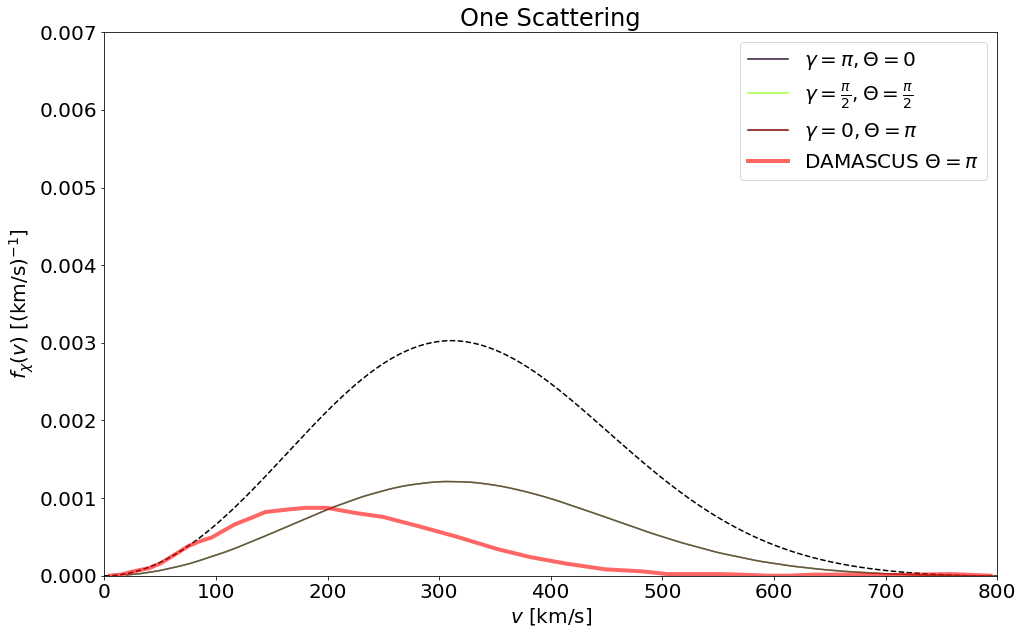

/home/alantero/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=31,7 m=300 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


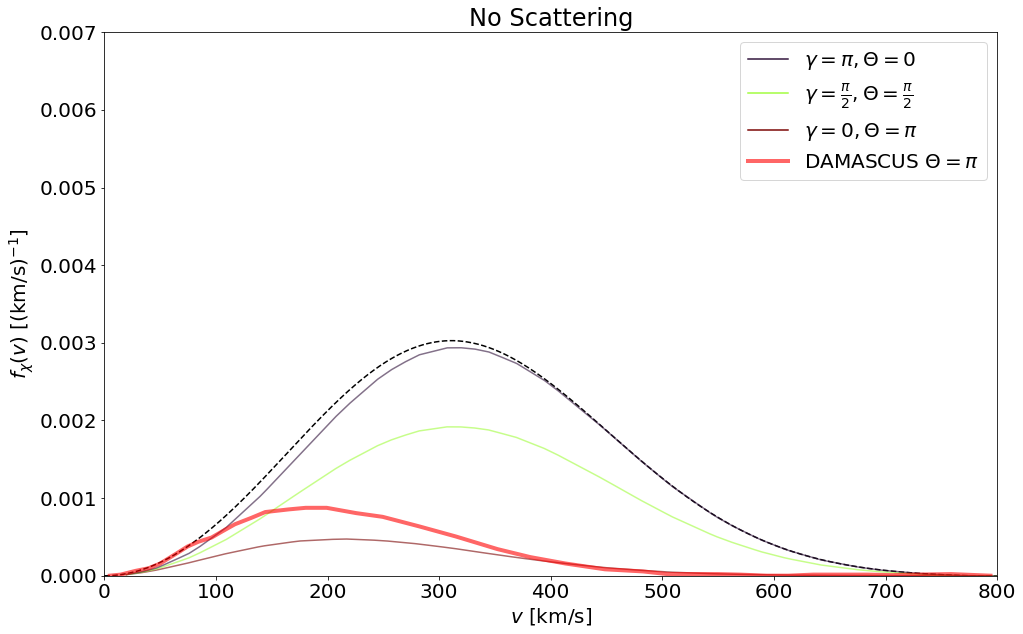

/home/alantero/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=31,7 m=300 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


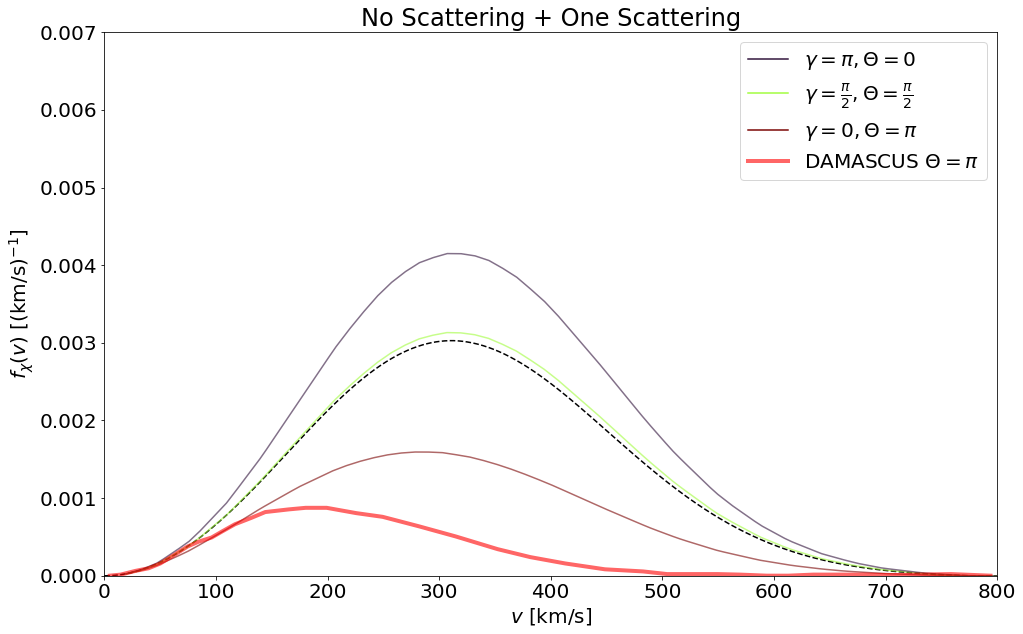

In [21]:
plot_velocity_distributions(1,2)